# Анализ рынка видеоигр

# Введение 

**С подробным выводом и полученными инсайдами можно ознакомиться в конце работы**

Полученные данные содержат в себе информацию о продажах игр в крупнейших регионах и их оценки от пользователей и критиков.

**Цель:**

Провести и анализ рынка за весь период, составить портрет пользователя каждого региона, предложить популярные платформы на которых будет выгодно продавать игры в 2017 году.

**Задачи:**
- Предобработка данных
    - Обработать пропуски.
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
- Исследовательский анализ
    -  Сколько игр выпускалось в разные годы
    -  Как менялись продажи по платформам. Найти платформы с наибольшими суммарными продажами, построить распределение по годам. Найти характерный срок за который появляются новые и исчезают старые платформы
    - Выявить актуальный период для создания прогноза на 2017 год
    - Найти лидирующие по продажам платформы в рамках актуального периода. Выбрать потенциально прибыльные платформы.
    - Построить график по глобальным продажам игр в разбивке по платформам. (ящик с усами)
    - Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
    - Найти взаимосвязь между жанрами и продажами.
- Определение портрета пользователя 
  (В рамках каждого региона)
  - Самые популярные платформы 
  - Самые популярные жанры
  - Определить влияние ESRB рейтинга на продажи в отдельном регионе. (Возрастной рейтинг)
- Проверка гипотез 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Средние пользовательские рейтинги жанров Action и Sports разные.
- Выводы по всему проекту

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Выгрузка и осмотр данных

In [2]:
data = pd.read_csv('C:/Users/niklu/Desktop/pererabotka/sbor_1/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Подготовка данных

Перед исследованием данных их необходимо подготовить для возможности роботы с ними.

**Этапы:**
- Переименование столбцов 
- Обработка пропусков 
- Изменение типа данных 
- Создание нового признака  

### Преименуем столбцы

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Обработка пропусков

Определяю столбцы с пропусками 

In [7]:
data.isna().sum().to_frame()

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


In [8]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data = data.dropna(subset=['name'])

В столбце название игры всего два пропуска, заменить их нечем, так же в строке отсувует много иной информации поэтому удалил.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В оценке пользователей, есть значенеи tbd, что значит игра еще не оценена.

In [11]:
data['year_of_release'].loc[data['user_score'] == 'tbd'].unique()

array([2010., 2005., 2011.,   nan, 2009., 2004., 1999., 2001., 2008.,
       2007., 2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013.,
       2016., 1997.])

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [13]:
data['year_of_release'].unique() #года выпуска игр со сзначениме nan в столбце пользовательской оценки

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Предположил, что TBD бывает только у не вышедших игр, но судя по датам выхода это не так. В рамках анализа TBD и пустое значение тождественные понятия, поэтому заменил.

In [14]:
data = data.dropna(subset = ['year_of_release'])


В столбце год выхода 269 пропусков, это всего 1,61% от датасета, при этом nan помешает в дальнейшей работе с столбцом. Удалил пропуски, чтоб была возможность изменить тип данных столбца.

In [15]:
data = data.reset_index(drop=True)

In [16]:
data['rating'] = data['rating'].fillna('unknown')


Пропуски остались в стобцах оценка критиков, пользователей и рейтинг. Заменить или рассчетать их невозможно, тк значения уникальны для каждой игры, поэтому пропуски оставляю, чтобы не было ошибок в последующем анализе.

Столбец rating  категориальный, вместо пропусков я создаю новую категорию unknown и заполняю ей пропуски.

In [17]:
data.isna().sum().to_frame() #проверка на пропуски, должны быть только в critic_score и user_score

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8461
user_score,8981


### Изменение типа данных

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

### Добавим столбец total_sales

In [19]:
#data['total_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [20]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы.

<AxesSubplot:>

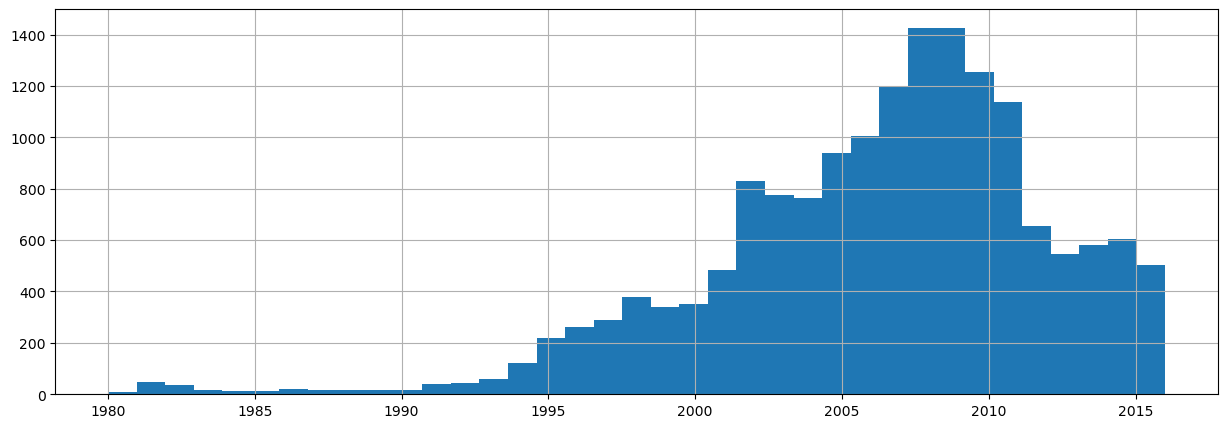

In [21]:
data['year_of_release'].hist(bins= 37, figsize = (15, 5))

In [22]:
data.loc[data['year_of_release'] <= 1995].count()

name               705
platform           705
year_of_release    705
genre              705
na_sales           705
eu_sales           705
jp_sales           705
other_sales        705
critic_score         4
user_score           4
rating             705
total_sales        705
dtype: int64

In [23]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

C 1980 по 1995 было выпущенно менее 5% от общей массы. За 15 летний период было выпущенно меньше игр, чем в любой год после 2003. 
    Поэтому активный периодом можно назвать с 1995 по нынешенее время (2016)

### Продажи по платформам. 

- Платформы с наибольшими суммарными продажами, распределение по годам. 
- Срок появления новых и исчезнавение старых платформы?

In [24]:
platform_sales = pd.pivot_table(data, index = 'platform', values = 'total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='total_sales', ascending = True);


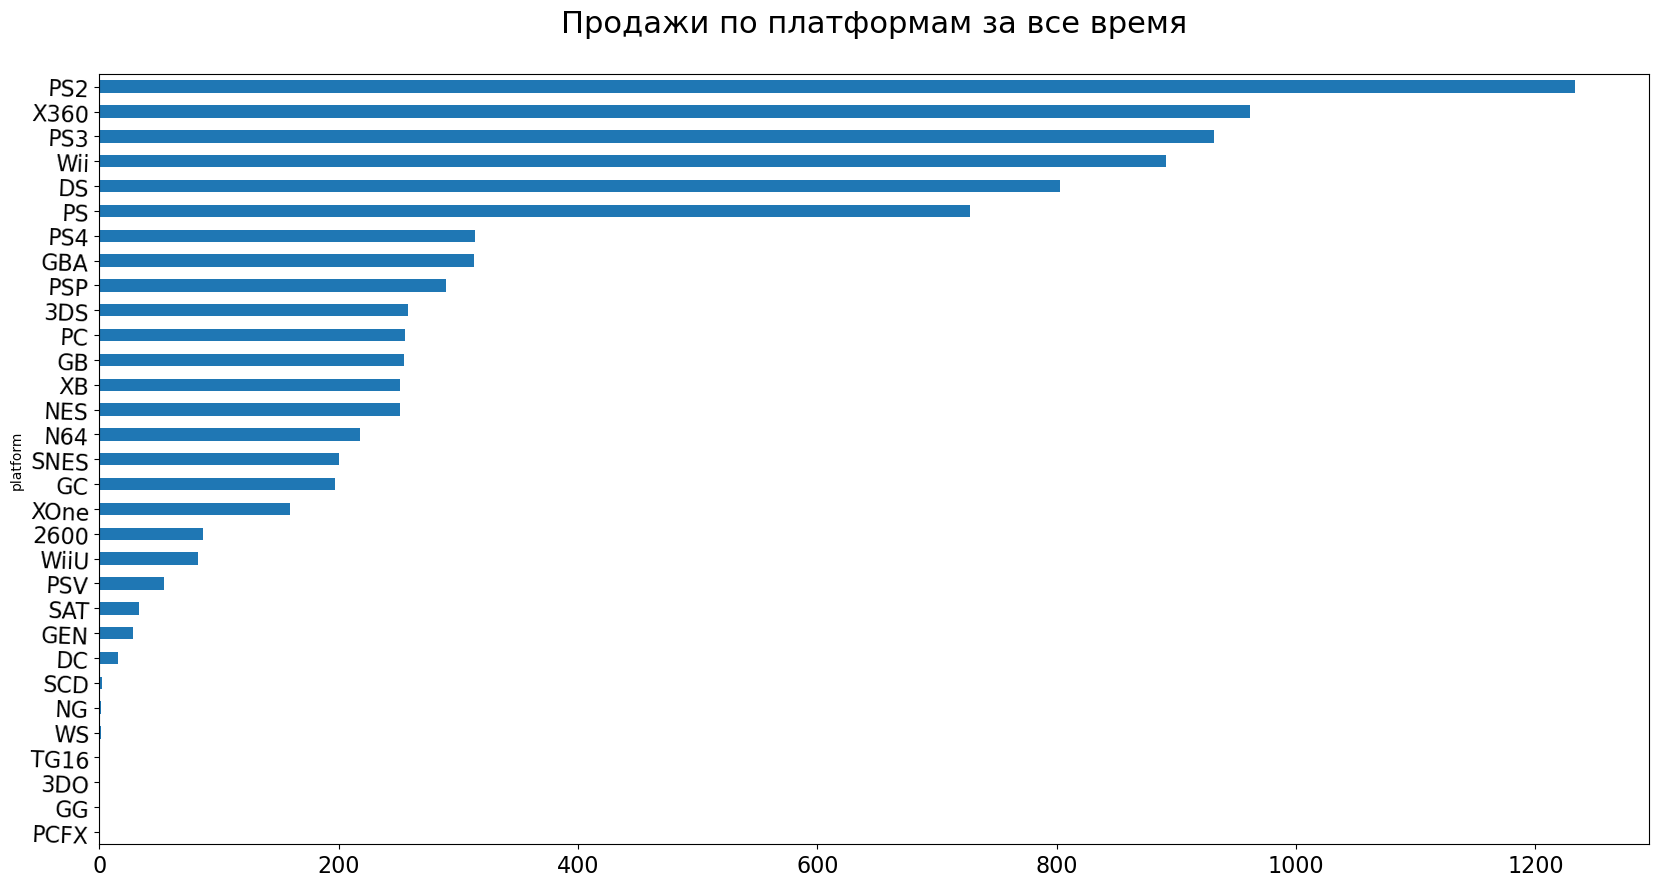

In [25]:
(platform_sales.plot(kind = 'barh', figsize=(20,10), rot = -2, legend = False, fontsize = 16)
               .set_title('Продажи по платформам за все время' + "\n", fontsize = 22, color = 'black'));

In [26]:
plat_life = pd.pivot_table(data, index = 'platform', values = 'year_of_release', aggfunc = ['min', 'max'])
plat_life['life'] = plat_life['max']['year_of_release'] - plat_life['min']['year_of_release']
print ('Среднее время жизни платформы:', round(plat_life['life'].mean(), 1), 'лет')

Среднее время жизни платформы: 7.6 лет


In [27]:
data['platform'].loc[data['year_of_release'] >=1995].unique() #платформы за активный период

pt_activ_per = pd.pivot_table(data.loc[data['year_of_release'] >=1995], index='platform', values='total_sales', aggfunc='sum')
pt_top_platforms = pt_activ_per.loc[pt_activ_per['total_sales']>100].sort_values(by = 'total_sales', ascending = False)
pt_top_platforms.head(12)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,721.55
PS4,314.14
GBA,312.88
PSP,289.53


Далее буду изучать топ 12 платформ за активный период.

In [28]:
active_df = data.loc[data['year_of_release']>=1995]
active_df = active_df.loc[((active_df['platform'] == 'PS2') |
                           (active_df['platform'] == 'X360') |
                           (active_df['platform'] == 'Wii') |
                           (active_df['platform'] == 'PS3') |
                           (active_df['platform'] == 'DS') |
                           (active_df['platform'] == 'PS') |
                           (active_df['platform'] == 'GBA') |
                           (active_df['platform'] == 'PS4') |
                           (active_df['platform'] == 'PSP') |
                           (active_df['platform'] == '3DS') |
                           (active_df['platform'] == 'XB') |
                           (active_df['platform'] == 'PC'))]
                   
display (active_df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [29]:
#создание сводной таблицы продаж на различных платформах по годам
pivot_year_platform = (active_df.pivot_table(
                                    index=['platform'],
                                    columns=['year_of_release'],
                                    values='total_sales',
                                    aggfunc='sum'))
#pivot_year_platform

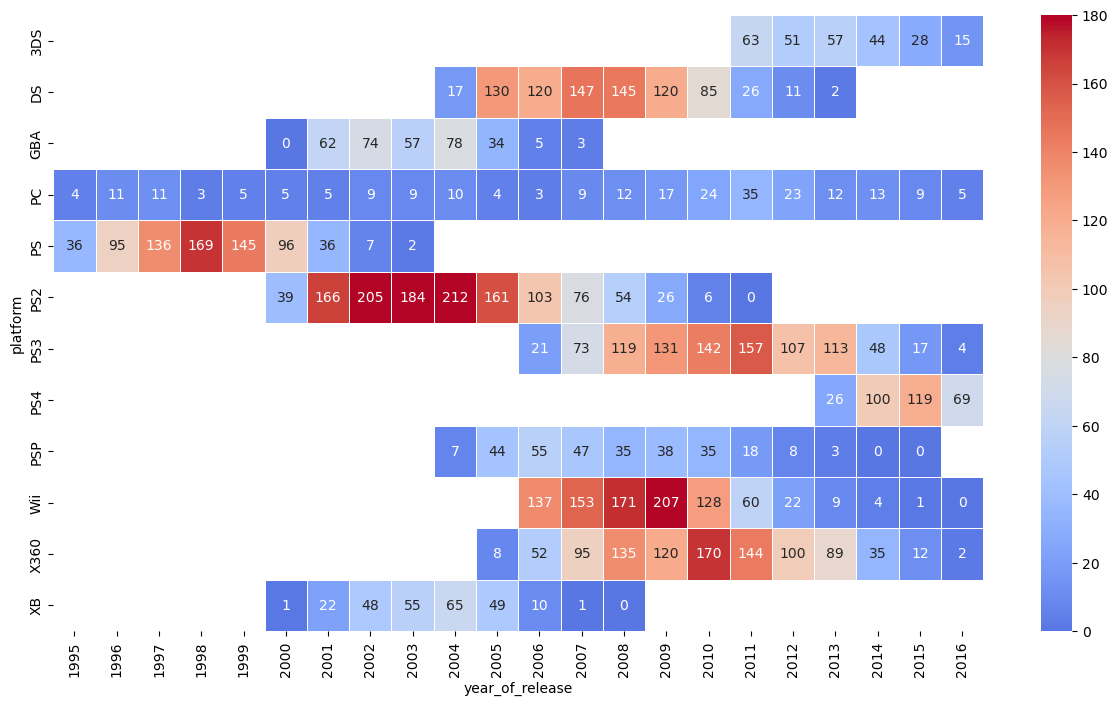

In [30]:
#sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(pivot_year_platform,
            linewidths = 0.5,
            annot=True, fmt=".0f", 
            vmin=0, vmax=180, center = 80,
            cmap= 'coolwarm', 
            )
plt.gcf().set_size_inches(15,8);

На тепловой карте можно прекрасно отследить и время жизни каждой платформы, и ее продажи. Так как здесь присутвуют только  топовые платформы нет огромного разбросса в данных.

### Исследование данных для построения прогноза на 2017 год

#### Какие платформы лидируют по продажам, растут и падают

In [31]:
liders_2016 = pd.pivot_table(data.loc[data['year_of_release'] >= 2014], index = 'platform', values='total_sales', aggfunc='sum')
liders_2016 = liders_2016.sort_values(by = 'total_sales', ascending = False)
liders_2016

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Есь 3 явных лидера 

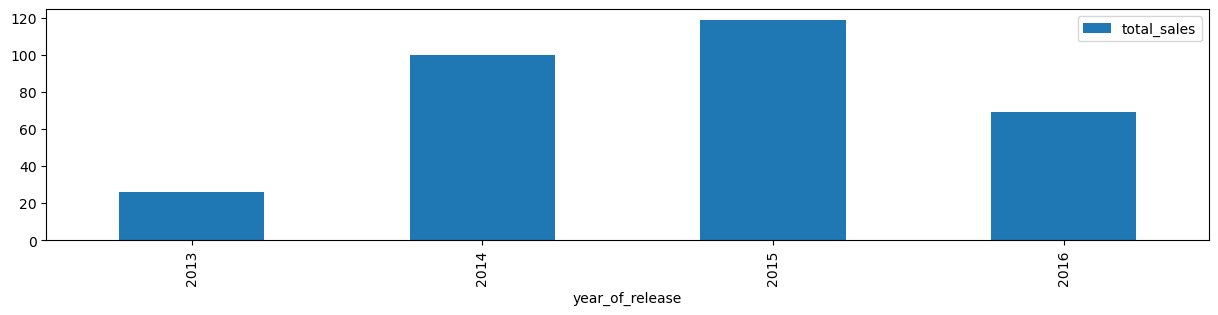

In [32]:
#data.loc[data['platform'] == 'PS4'].plot(kind = 'bar', x= 'year_of_release', y= 'total_sales')

PS4_sales = pd.pivot_table(data.loc[data['platform'] == 'PS4'], index='year_of_release', values='total_sales', aggfunc = 'sum')
PS4_sales.plot(kind = 'bar')
plt.gcf().set_size_inches(15, 3);

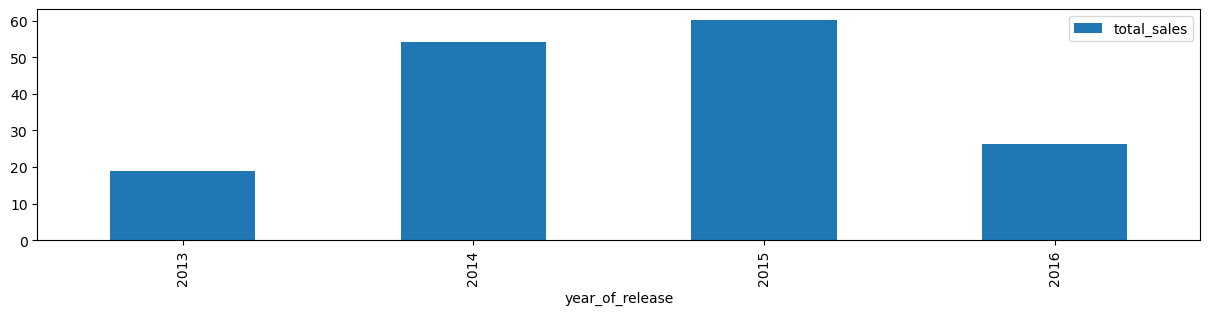

In [33]:
XOne_sales = pd.pivot_table(data.loc[data['platform'] == 'XOne'], index='year_of_release', values='total_sales', aggfunc = 'sum')
XOne_sales.plot(kind = 'bar')
plt.gcf().set_size_inches(15, 3);

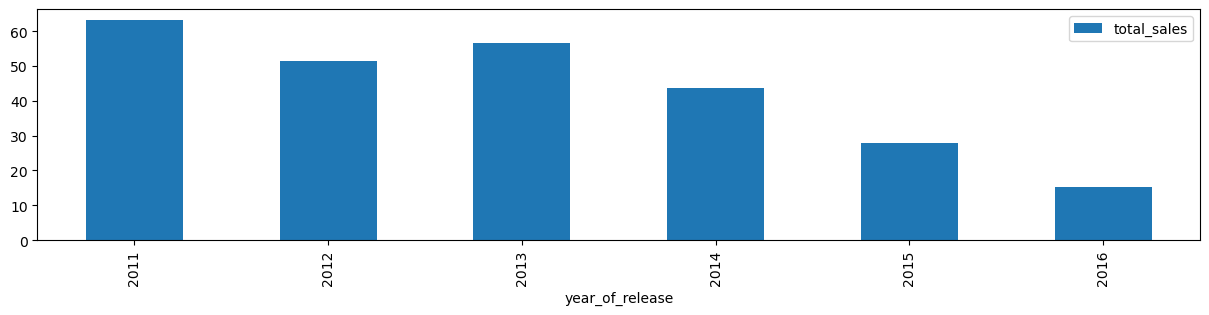

In [34]:
tDS_sales = pd.pivot_table(data.loc[data['platform'] == '3DS'], index='year_of_release', values='total_sales', aggfunc = 'sum')
tDS_sales.plot(kind = 'bar')
plt.gcf().set_size_inches(15, 3);

Потенциально выгодными являются все платформы с высокими продажами, и сущесвенное снижение продаж после 1-2 года выпуска новой платформы так же своейсвенно для любой из них. Единсвенное можно отметить, что в силу особенностей PC оно сущесвует все время и продажи на это платформы повышаются в моменты падения продаж на других платформах. В 2017 новых плаформ еще нет, а имеющиеся конкуртынты начинают устаривать. Поэтому выгодными платформами можно назвать ТОП-4 2016 года (PS4, XOne, 3DS, PC)


#### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

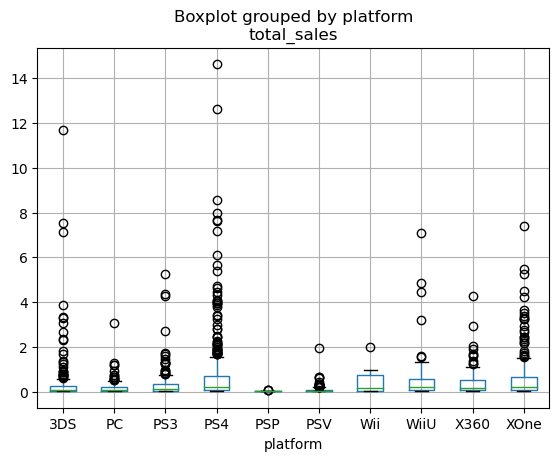

In [35]:
data.loc[(data['year_of_release'] >= 2014) & (data['total_sales'])].boxplot(column = ['total_sales'], by = 'platform')
#ограничил общие продажи до 3х так как график был плохо читаем, а выше 3 были только выбросы 

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

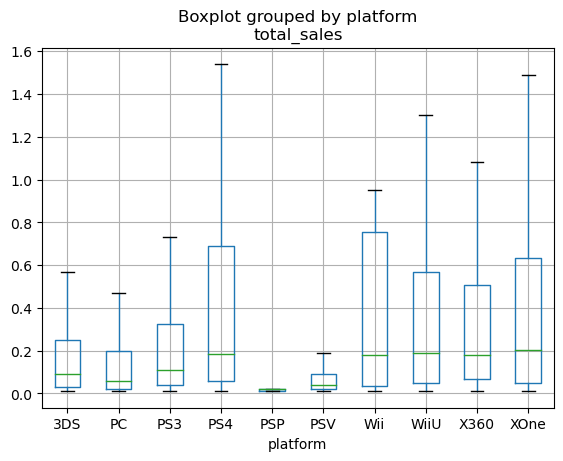

In [36]:
data.loc[(data['year_of_release'] >= 2014) & (data['total_sales'])].boxplot(column = ['total_sales'], by = 'platform', showfliers=False)

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Возьмем самую успешную платформу 2016 года PS4

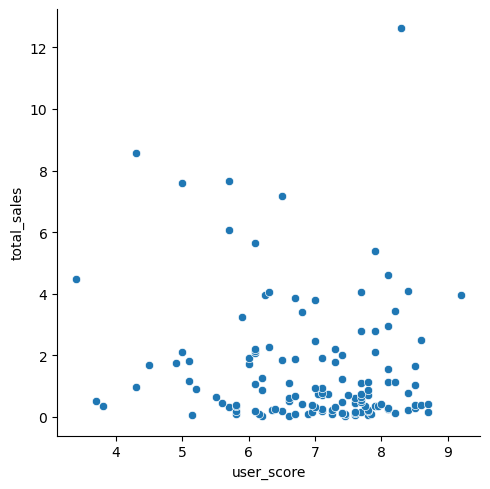

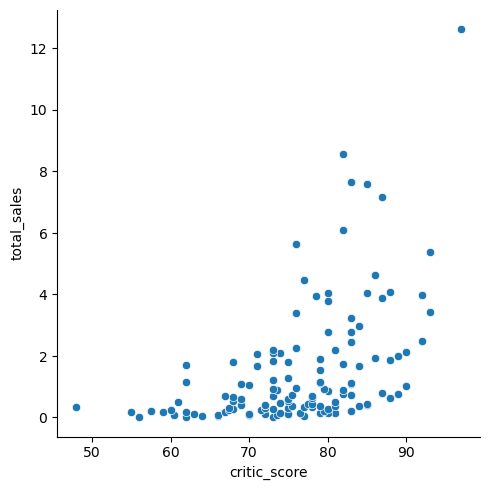

In [37]:
# check
price_pivot_area = data.loc[(data['year_of_release'] >= 2014) & (data['platform'] == 'PS4')].pivot_table(index='total_sales', values=([
    'user_score', 'critic_score']), aggfunc='median')

price_pivot_area = price_pivot_area.reset_index()

for row in ['user_score', 'critic_score']:
    sns.relplot(data=price_pivot_area, y='total_sales', x=row, kind='scatter')

Как можно заметить при сравнение двух графиков оценка критиков оказывает большее влияние на последущие продажи игры. Вероятно это связанно с тем, что оценку критиков известна до выходаа игры в общий доступ и часто используется в рекламной компании.
При этом в оценке пользователей, есть несколько не обыное явление, такое как высокие продажи при низкой оценке.

Коэффицент кореляции оценок критиков и продаж на платформе PS4 0.49759051291268336
Коэффицент кореляции оценок пользователей и продаж на платформе PS4 -0.1420233332895225
Коэффицент кореляции оценок критиков и продаж на платформе PS3 0.39858706781619513
Коэффицент кореляции оценок пользователей и продаж на платформе PS3 0.06400272674149038
Коэффицент кореляции оценок критиков и продаж на платформе 3DS 0.31333861216666686
Коэффицент кореляции оценок пользователей и продаж на платформе 3DS 0.3330689705927036
Коэффицент кореляции оценок критиков и продаж на платформе XOne 0.44938896559524777
Коэффицент кореляции оценок пользователей и продаж на платформе XOne -0.09459631872785133
Коэффицент кореляции оценок критиков и продаж на платформе PC 0.020194088757011203
Коэффицент кореляции оценок пользователей и продаж на платформе PC -0.19444381764648228
Коэффицент кореляции оценок критиков и продаж на платформе WiiU 0.40761011162134153
Коэффицент кореляции оценок пользователей и продаж на платф

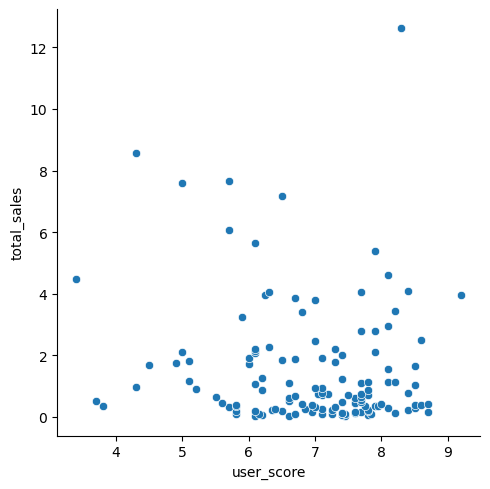

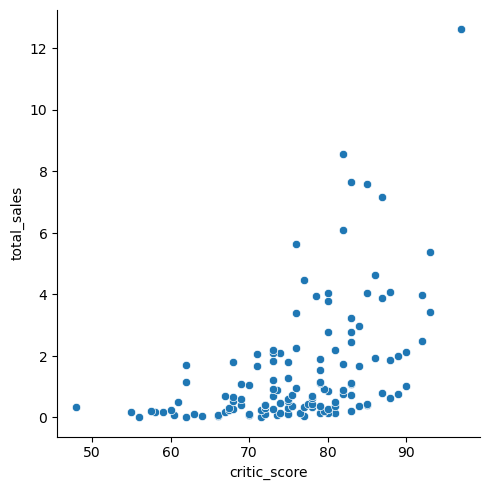

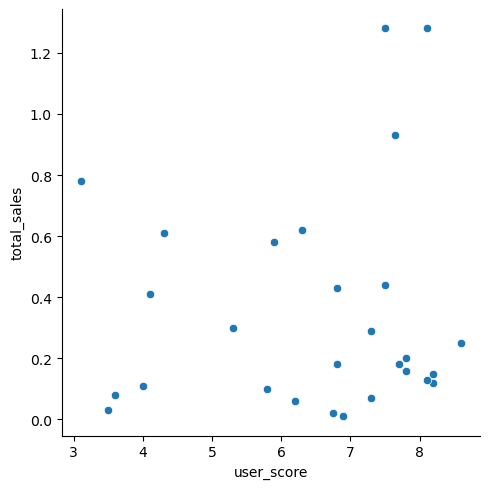

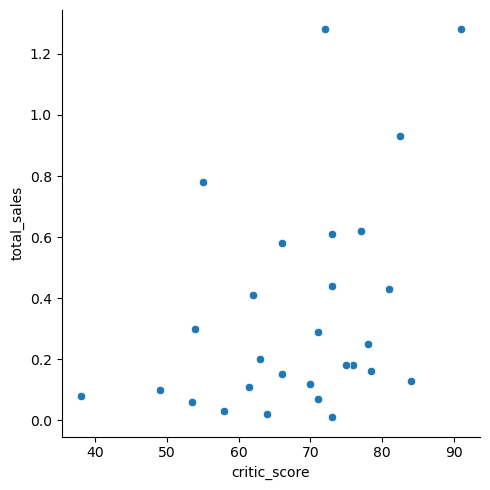

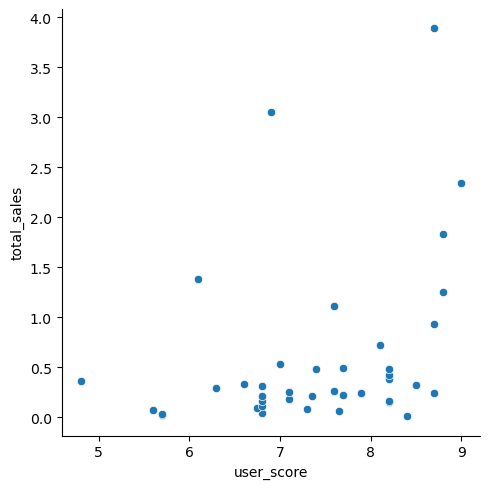

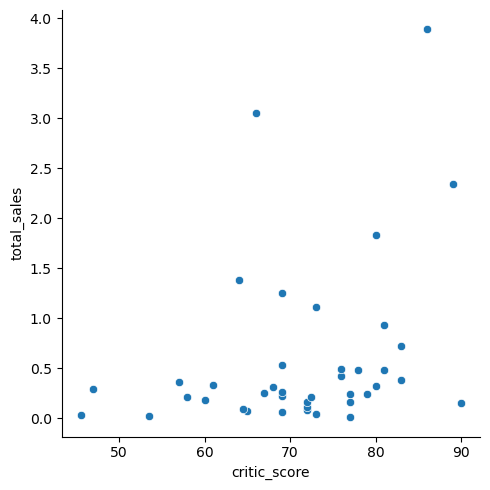

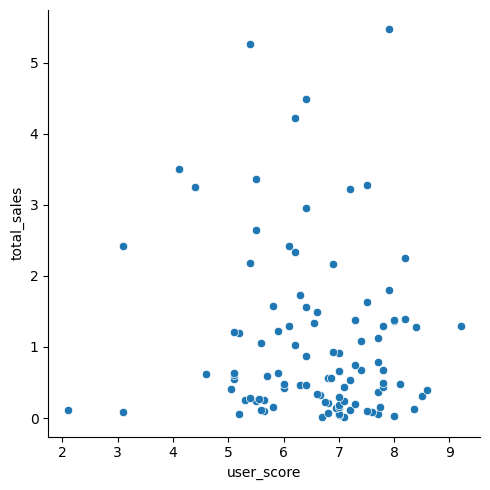

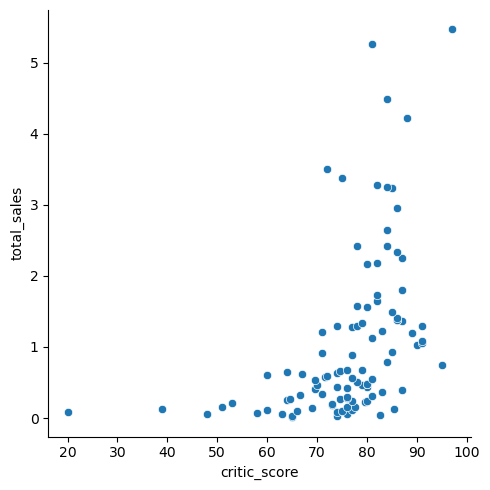

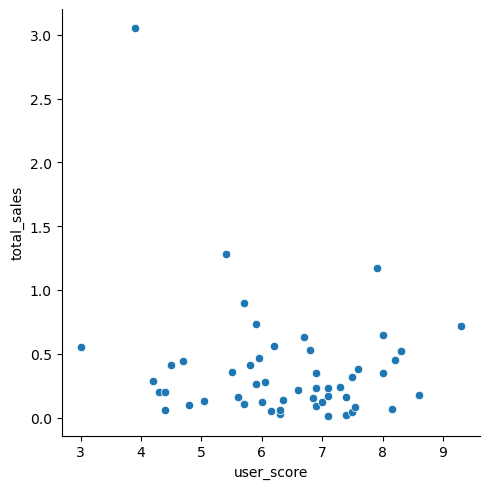

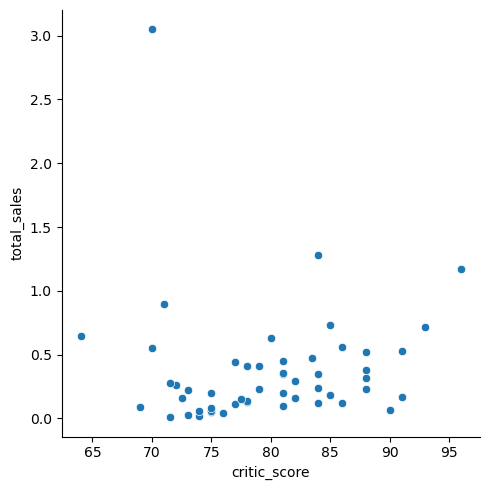

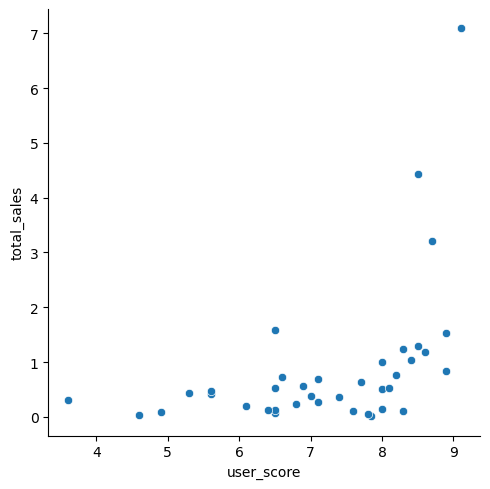

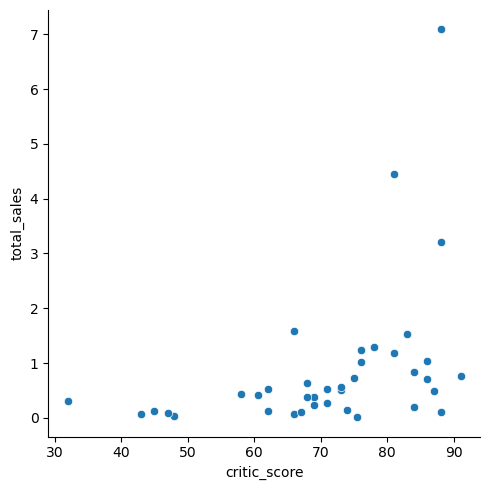

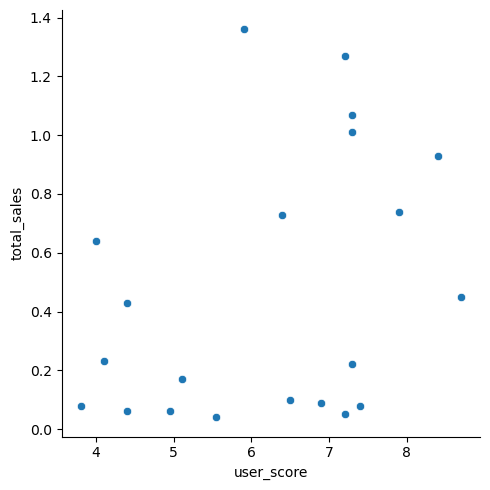

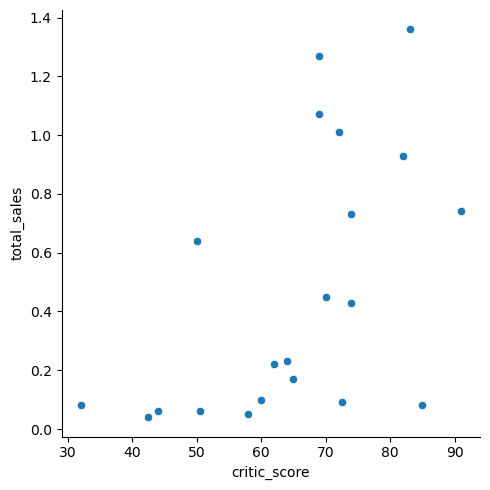

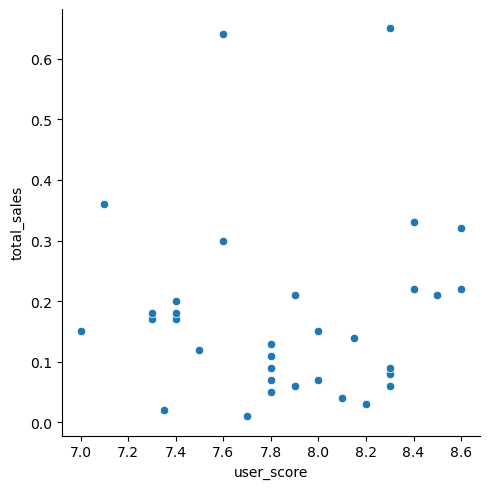

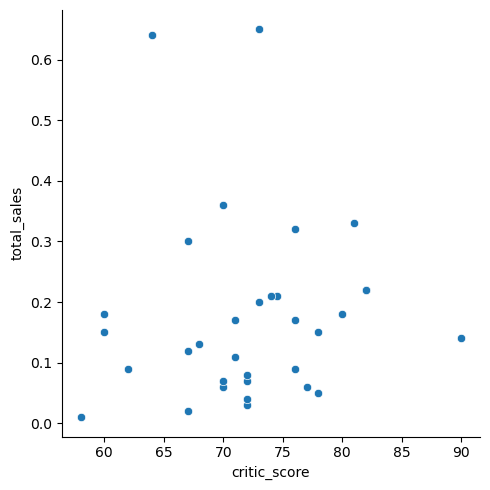

In [38]:
#['PS2','X360','Wii','PS3','DS','PS','GBA','PS4','PSP','3DS','XB','PC']
df_corr = data.dropna(subset =['user_score', 'critic_score'])
critic_corr_mean = []

user_corr_mean = []
for plat in ['PS4','PS3','3DS','XOne','PC', 'WiiU', 'X360', 'PSV']:
    price_pivot_area =( 
        df_corr.loc[(df_corr['year_of_release'] >= 2014) & (df_corr['platform'] == plat)]
            .pivot_table(index='total_sales', values=(['user_score', 'critic_score']), aggfunc='median'))

    price_pivot_area = price_pivot_area.reset_index()
    
    print('Коэффицент кореляции оценок критиков и продаж на платформе', plat, np.corrcoef(price_pivot_area['critic_score'], price_pivot_area['total_sales'])[0,1])
    critic_corr_mean.append(np.corrcoef(price_pivot_area['critic_score'], price_pivot_area['total_sales'])[0,1])
    print('Коэффицент кореляции оценок пользователей и продаж на платформе', plat, np.corrcoef(price_pivot_area['user_score'], price_pivot_area['total_sales'])[0,1])
    user_corr_mean.append(np.corrcoef(price_pivot_area['user_score'], price_pivot_area['total_sales'])[0,1])
    
    for row in ['user_score', 'critic_score']:
        sns.relplot(data=price_pivot_area, y='total_sales', x=row, kind='scatter')
            #.set_title('График рассения - Оценка критиков/пользователей - Общие продажи' +
                      #  'Платформа' + "\n", fontsize = 22, color = 'SteelBlue')) 


In [39]:
df_corr_stat = pd.DataFrame({'platform':['PS4','PS3','3DS','XOne','PC', 'WiiU', 'X360', 'PSV'],
                             'critic_corr':critic_corr_mean,
                             'user_corr':user_corr_mean})
display (df_corr_stat)
print('Среднее значение кореляции критиков:', df_corr_stat['critic_corr'].mean())
print('Среднее значение кореляции пользователей:', df_corr_stat['user_corr'].mean())

,platform,critic_corr,user_corr
0,PS4,0.497591,-0.142023
1,PS3,0.398587,0.064003
2,3DS,0.313339,0.333069
3,XOne,0.449389,-0.094596
4,PC,0.020194,-0.194444
5,WiiU,0.407610,0.455535
6,X360,0.533976,0.348055
7,PSV,0.044677,0.048030


Среднее значение кореляции критиков: 0.33317034746818025
Среднее значение кореляции пользователей: 0.10220353580894043


####  Общее распределение игр по жанрам. Самые прибыльные жанры.

Text(0.5, 1.0, 'Популярность жанров по миру(по общей прибыли)\n')

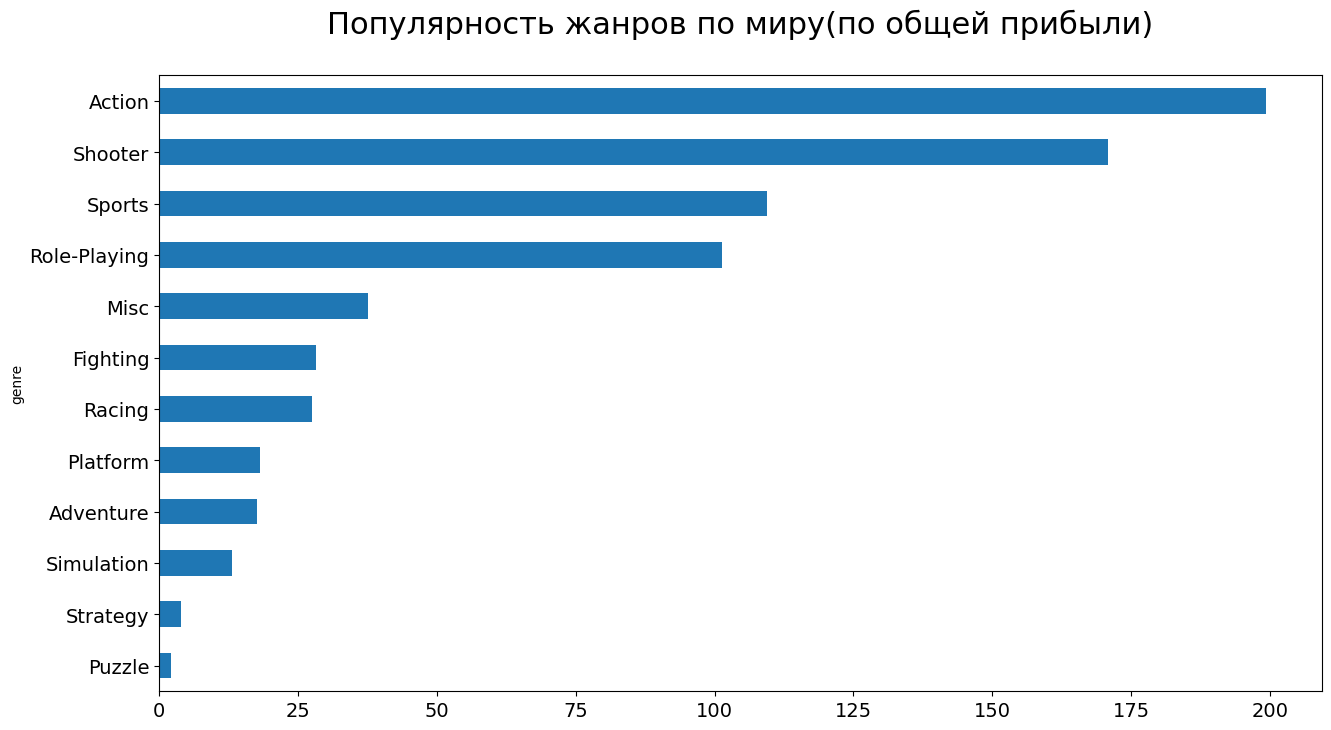

In [40]:
genre_pivot_total = pd.pivot_table(data.loc[data['year_of_release']>=2014], index ='genre', values = 'total_sales', aggfunc = 'sum')
genre_pivot_total = genre_pivot_total.sort_values(by = "total_sales")
(genre_pivot_total.plot(kind = 'barh', figsize=(15,8), legend = False, fontsize = 14)
               .set_title('Популярность жанров по миру(по общей прибыли)' + "\n", fontsize = 22, color = 'black'))

<AxesSubplot:>

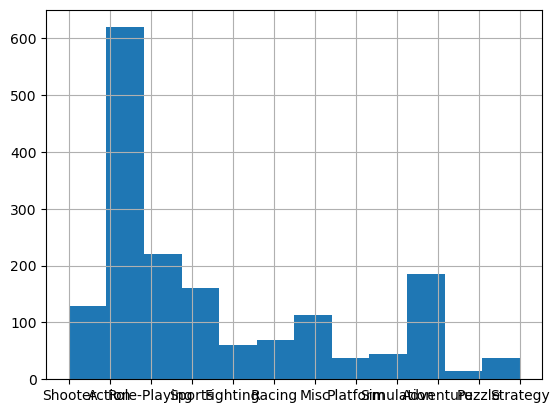

In [41]:
data['genre'].loc[data['year_of_release']>=2014].hist(bins=12)

Самыми прибыльными жанрами можно назвать Экшн, шутер, спортивные и ролевые игры, но есть нюанс, что экшн игр очень много (в 2-3 раза больше чем любого другого), поэтому суммарная продажи естесвенно больше. Вглянем иначе.

Text(0.5, 1.0, 'Популярность жанров по миру(по медиане)\n')

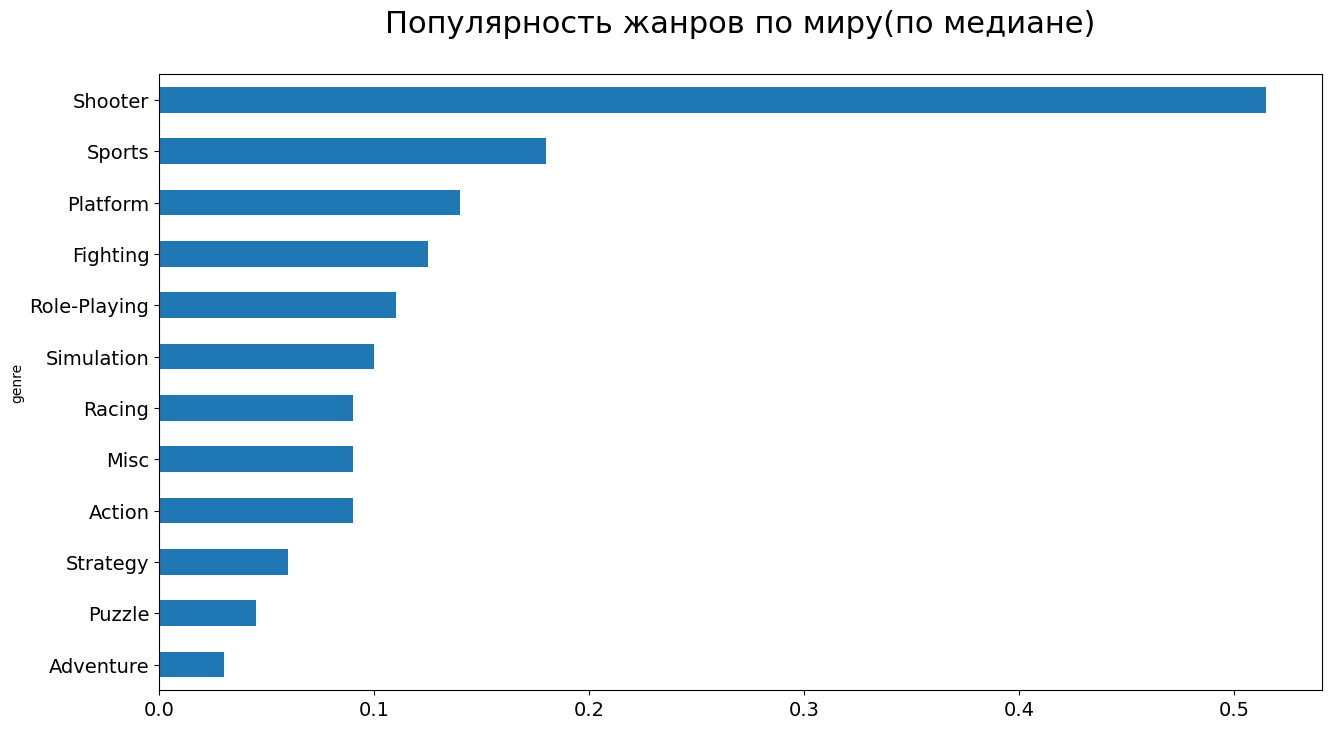

In [42]:
genre_pivot_median = pd.pivot_table(data.loc[data['year_of_release']>=2014], index ='genre', values = 'total_sales', aggfunc = 'median')
genre_pivot_median = genre_pivot_median.sort_values(by = "total_sales")
(genre_pivot_median.plot(kind = 'barh', figsize=(15,8), legend = False, fontsize = 14)
               .set_title('Популярность жанров по миру(по медиане)' + "\n", fontsize = 22, color = 'black'))

Если расматривать медианные продажи по жанру, то картина менятся.
Шутер являются самым прибыльным жанром за одну игру. Его можно поставить в категорию сверх популярные.


Остальные жанры плавно убывают относительно друг друга можно назвать их просто популярными. 

Пазлы и адвенчуры можно назвать непопулярными.

## Портрет пользователя каждого региона

### Портрет NA (северная Америка)

#### Топ-5 платформ

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


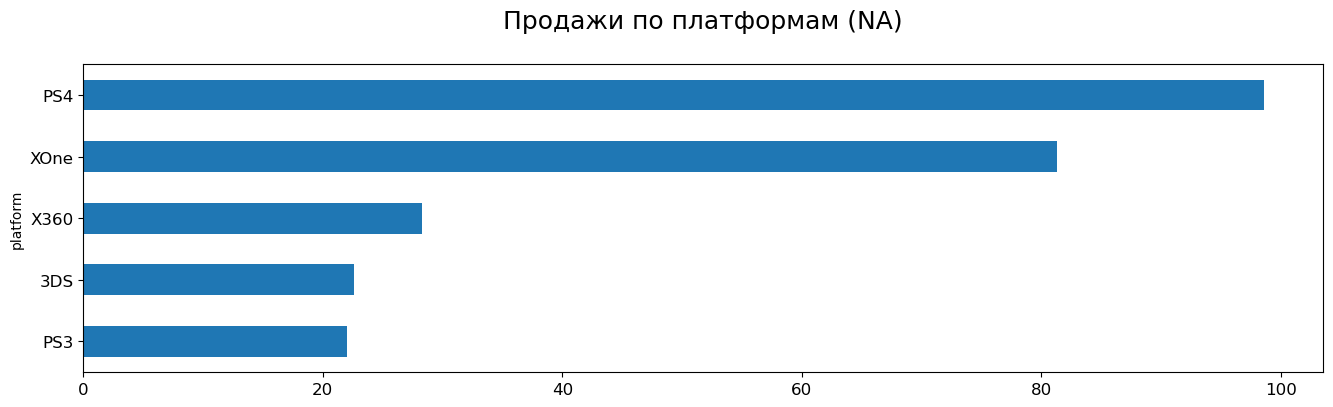

In [44]:
platform_sales_na = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'platform', values = 'na_sales', aggfunc='sum')
platform_sales_na = platform_sales_na.sort_values(by='na_sales', ascending = True);
platform_sales_na = platform_sales_na.loc[platform_sales_na['na_sales']>20]

(platform_sales_na.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по платформам (NA)' + "\n", fontsize = 18, color = 'black'));

#### Топ-5 жанров

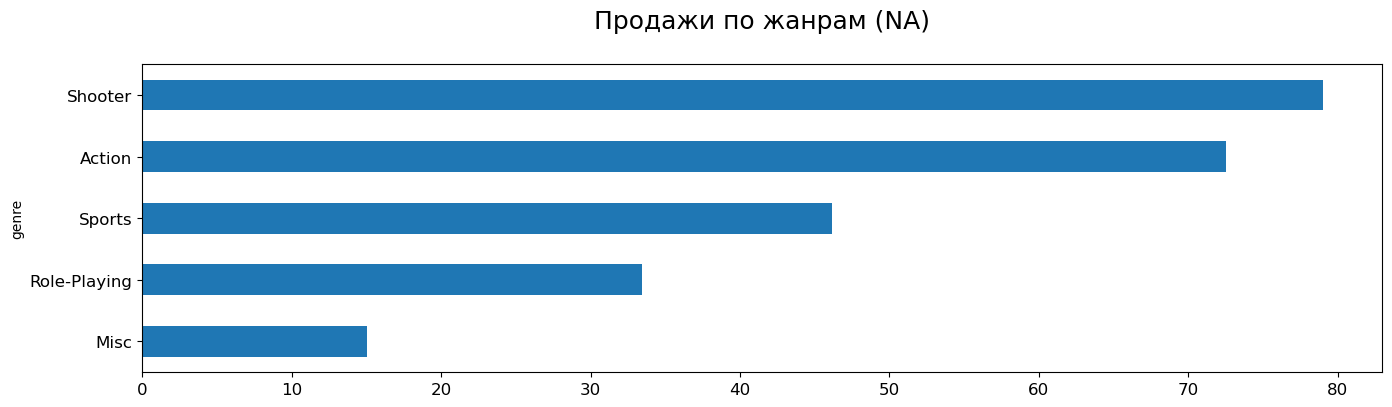

In [45]:
genre_pivot_na = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'genre', values = 'na_sales', aggfunc='sum')
genre_pivot_na = genre_pivot_na.sort_values(by='na_sales', ascending = True);
genre_pivot_na = genre_pivot_na.loc[genre_pivot_na['na_sales']>13]

(genre_pivot_na.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по жанрам (NA)' + "\n", fontsize = 18, color = 'black'));

#### Влияние рейтинга ESRB на продажи в  NA

<AxesSubplot:xlabel='rating', ylabel='na_sales'>

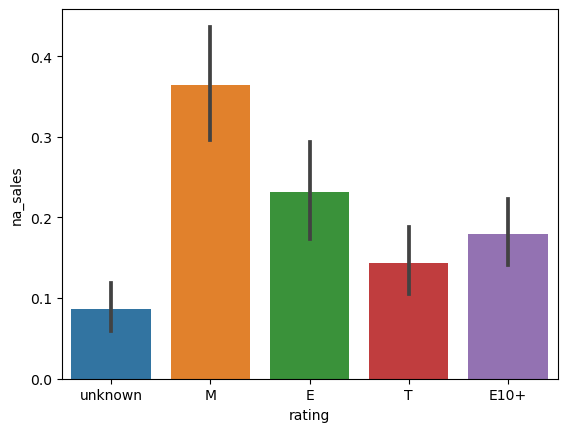

In [46]:
sns.barplot(data=data[data['year_of_release'] >= 2014], x='rating', y='na_sales') # kind='scatter')

<AxesSubplot:>

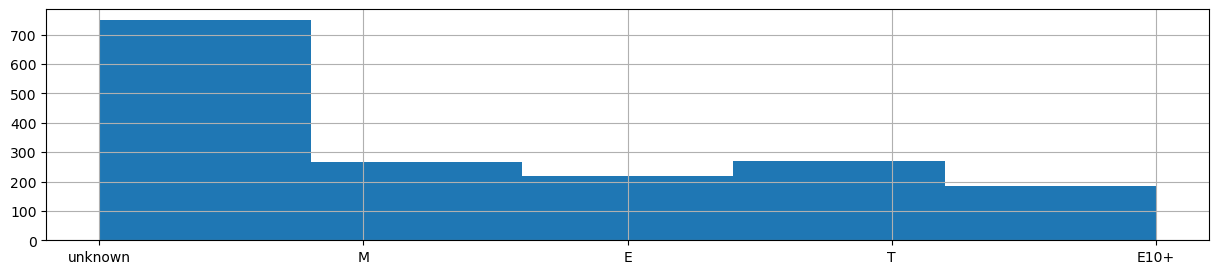

In [47]:
data['rating'].loc[data['year_of_release'] >= 2014].hist(bins=5, figsize = (15, 3))

### Портрет EU (Европа)

#### Топ-5 платформ

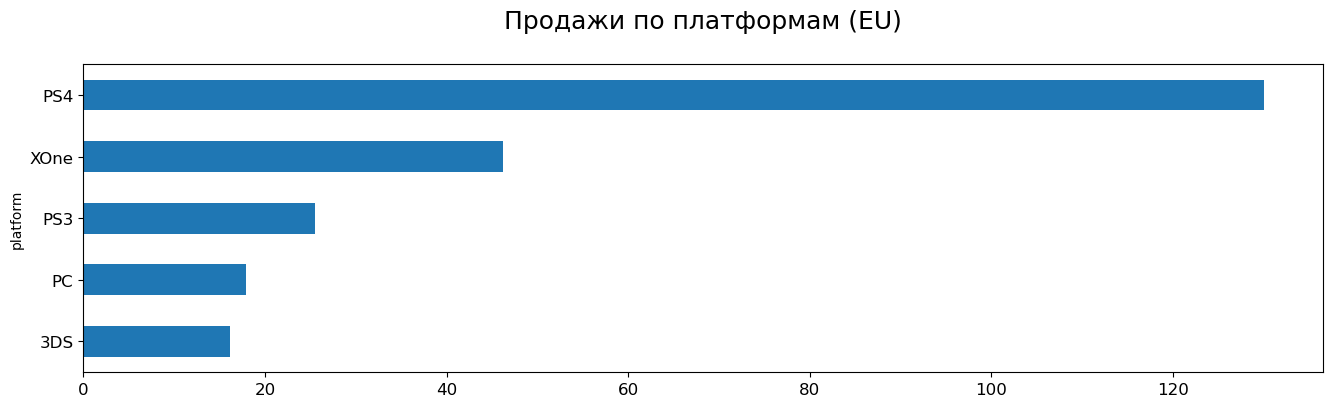

In [48]:
platform_sales_eu = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'platform', 
                                                                             values = 'eu_sales', 
                                                                             aggfunc='sum')

platform_sales_eu = platform_sales_eu.sort_values(by='eu_sales', ascending = True);
platform_sales_eu = platform_sales_eu.loc[platform_sales_eu['eu_sales']>16]

(platform_sales_eu.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по платформам (EU)' + "\n", fontsize = 18, color = 'black'));

#### Топ-5 жанров

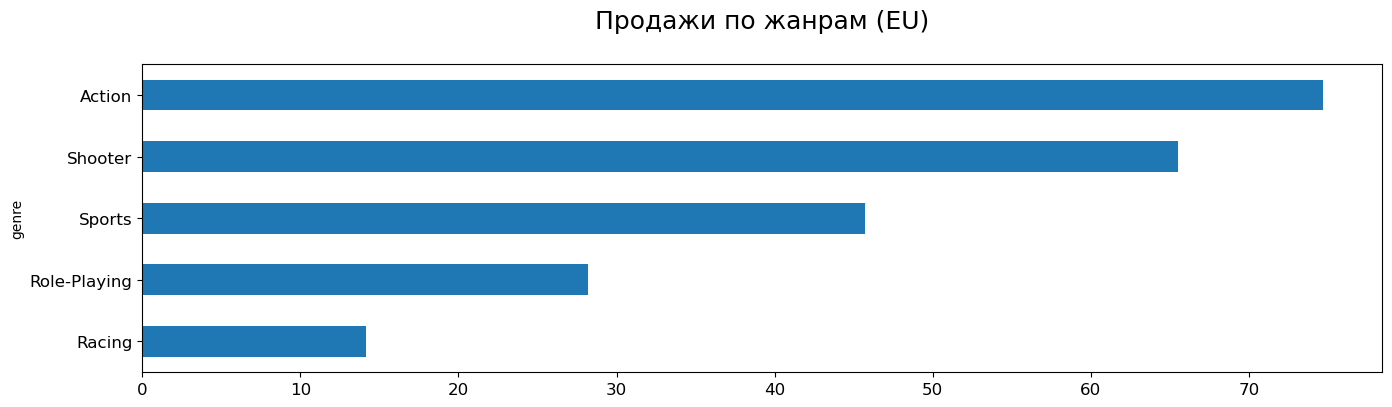

In [49]:
genre_pivot_eu = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'genre', values = 'eu_sales', aggfunc='sum')
genre_pivot_eu = genre_pivot_eu.sort_values(by='eu_sales', ascending = True);
genre_pivot_eu = genre_pivot_eu.loc[genre_pivot_eu['eu_sales']>13]

(genre_pivot_eu.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по жанрам (EU)' + "\n", fontsize = 18, color = 'black'));

#### Влияние рейтинга ESRB на продажи в  EU

<AxesSubplot:xlabel='rating', ylabel='eu_sales'>

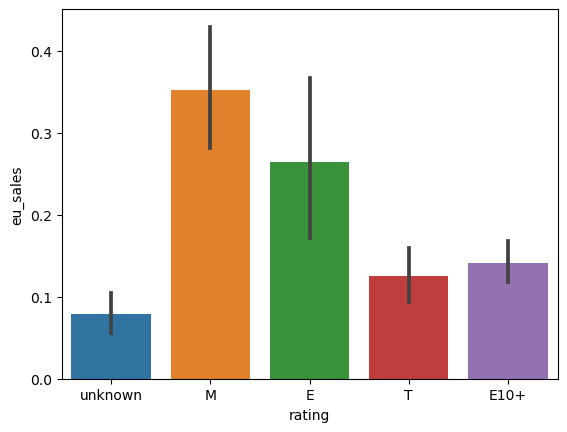

In [50]:
sns.barplot(data=data[data['year_of_release'] >= 2014], x='rating', y='eu_sales')

### Портрет JP (Япония)

#### Топ-5 платформ

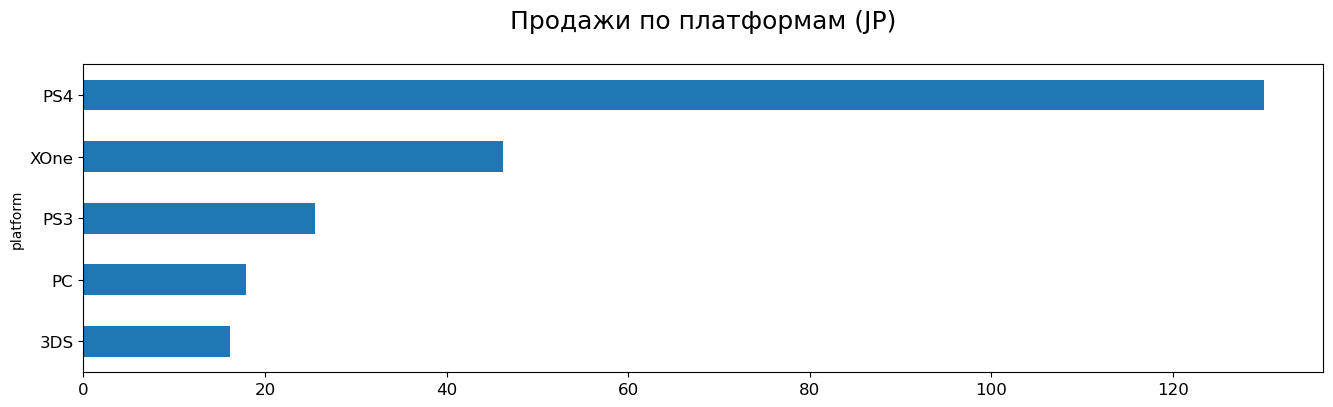

In [51]:
platform_sales_jp = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'platform', 
                                                                             values = 'jp_sales', 
                                                                             aggfunc='sum')

platform_sales_jp = platform_sales_jp.sort_values(by='jp_sales', ascending = True);
platform_sales_jp = platform_sales_jp.loc[platform_sales_jp['jp_sales']>16]

(platform_sales_eu.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по платформам (JP)' + "\n", fontsize = 18, color = 'black'));

#### Топ-5 жанров

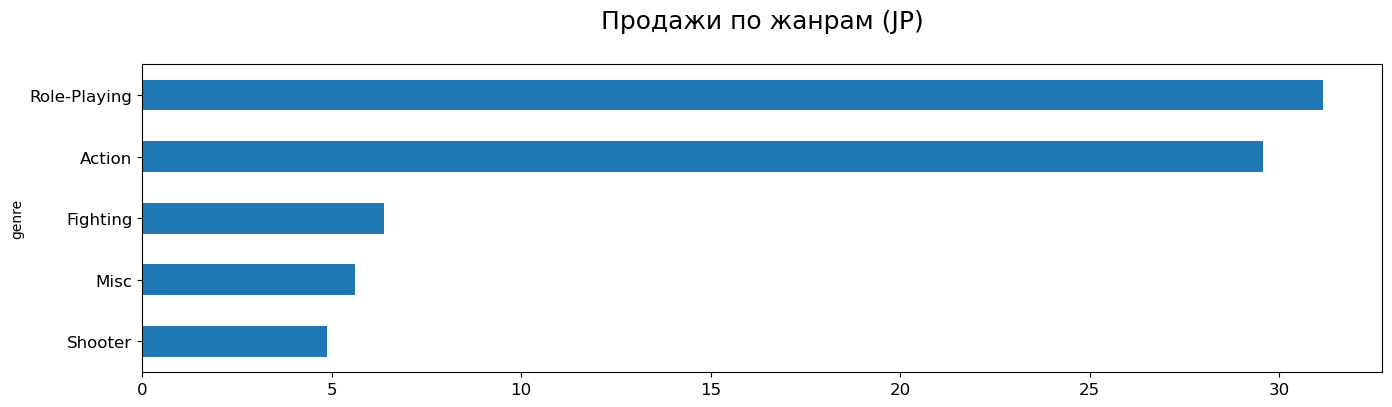

In [52]:
genre_pivot_jp = pd.pivot_table(data.loc[data['year_of_release']>= 2014], index = 'genre', values = 'jp_sales', aggfunc='sum')
genre_pivot_jp = genre_pivot_jp.sort_values(by='jp_sales', ascending = True);
genre_pivot_jp = genre_pivot_jp.loc[genre_pivot_jp['jp_sales']>4]

(genre_pivot_jp.plot(kind = 'barh', figsize=(16,4), legend = False, fontsize = 12)
               .set_title('Продажи по жанрам (JP)' + "\n", fontsize = 18, color = 'black'));

#### Влияние рейтинга ESRB на продажи в JP

<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

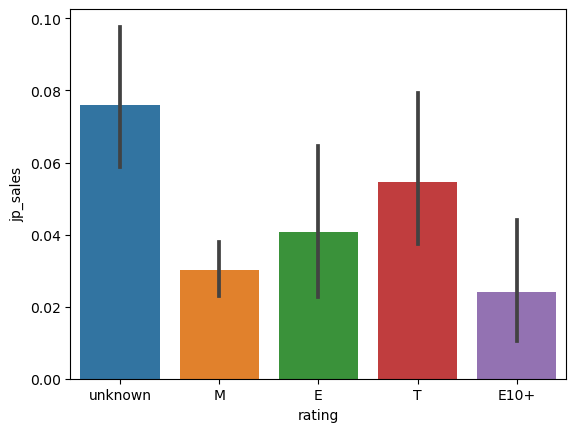

In [53]:
sns.barplot(data=data[data['year_of_release'] >= 2014], x='rating', y='jp_sales')

### Подвывод

Платформы:
- Во всех регионах самой популярной платформой является PS4 и XOne
- В NA PC не входит в топ, в отличии от других регионов где он на 4 месте
- X360 присутвует только на Американском рынке

Жанры:
- У европы и америки очень схожие предпочтения в жанрах (Шутеры и Экшн борятся за первое место)
- Гонки популярны только в европе
- Экшн-игры популярны везде
- Самый популярный жанр Японии ролевые-игры, самый не популярный шутеры(Что сущесвенно отличает данный регион)
- Файтинги популярны только в Японии 
- На рынке японии не популярны спортивные игры

Возрастной рейтинг:
- В Америке в каждом рейтинге хорошие продажи. "Взрослые"(М) игры самые популярные,  подростковые игры не популярны
- В Европе популярны либо взрослые, либо совсем детские. Игры для детей от 10 лет и подростковые не популярны.
- В Японии популярнее всего подростковые игры. И большое значение неопределеного возростногол рейтинга. Видимо на японском рынке лицензирование по возрасту как-то иначе устроено.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Гипотеза 0: user_score[XOne] = user_score[PC]

Альтернативная гипотеза: user_score[XOne] (< or >) user_score[PC]

Гипотеза двухстороняя

In [54]:
h_df = data.dropna(subset = ['user_score'])
h_df = h_df.loc[h_df['year_of_release']>=2014]

In [55]:
alpha = 0.05
results = st.ttest_ind(
    h_df['user_score'].loc[(h_df['platform'] == 'PC')], 
    h_df['user_score'].loc[h_df['platform'] == 'XOne'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action  и Sports разные.
Гипотеза 0: user_score[Action] (< or >) user_score[Sports]

Альтернативная гипотеза: user_score[Action] = user_score[Sports]


In [56]:
alpha = 0.05

results = st.ttest_ind(
    h_df['user_score'].loc[h_df['genre'] == 'Sports'], 
    h_df['user_score'].loc[h_df['genre'] == 'Action'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаем нулевую гипотезу


## Выводы

**План проекта**

1. Получение и знакомство с данными
2. Подготовка данных
3. Иследовательский анализ
4. Составил портрет пользователей по регионам
5. Статистический анализ, проверка гипотез


### Получение и знакомство с данными

- Загрузил датасет 
- Получили общую техгическую информацию с помощью метода .info()
- Вывели первые строки датасета на экран для знакомства 

### Подготовка данных

1. Названия столбцов изменены (Теперь только маленькие буквы)
2. Были обнаруженны пропуски в столбцах 
    - name и genre 
     два пропуска просто удалил 
    - Год релиза
    269 пропусков были удалены, так как год выхода один из важнейших параметров для анализа в дальнейшем и пропуски составляют менее 2% от датасеты
    - в user_score обнаруженно аномальное значение tbd
    TBD значит оценки еще нет, для нас тоже самое что пустое значение на него и заменили 
    - Остальные пропуски оставлены не тронутыми т.к. замена их невозможно и внесла бы сльную погрешность в анализ. Для дальнейшей работы пропуски не мешают
3. Изменения типа данных
    - user_score изменили на float, так как пользовательский рейтинг может быть только численым значением 
    - Год выпуска изменили на int, так как год может быть только целочисленым значением
4. Создали новый стобец total_sales, является суммой продаж в каждом регионе

### Иследовательский анализ

#### Кол-во выпущенных игр в разные годы

<AxesSubplot:>

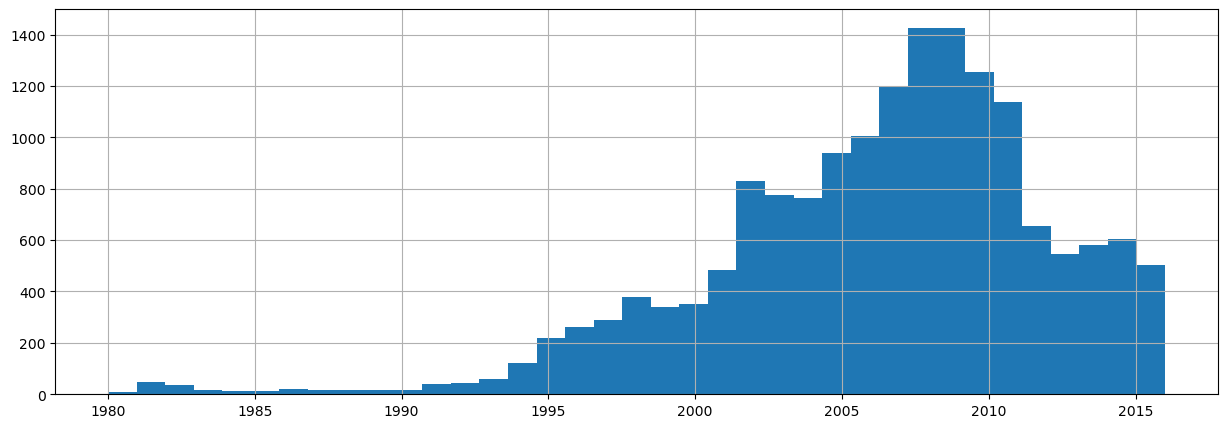

In [57]:
data['year_of_release'].hist(bins= 37, figsize = (15, 5))

Из данной гистограммы можно сделать вывод, что до 95 года выпускалось очень мало игр. за 15 летний период выпущено меньше, чем за один год после 2003.

#### Продажи по платформам

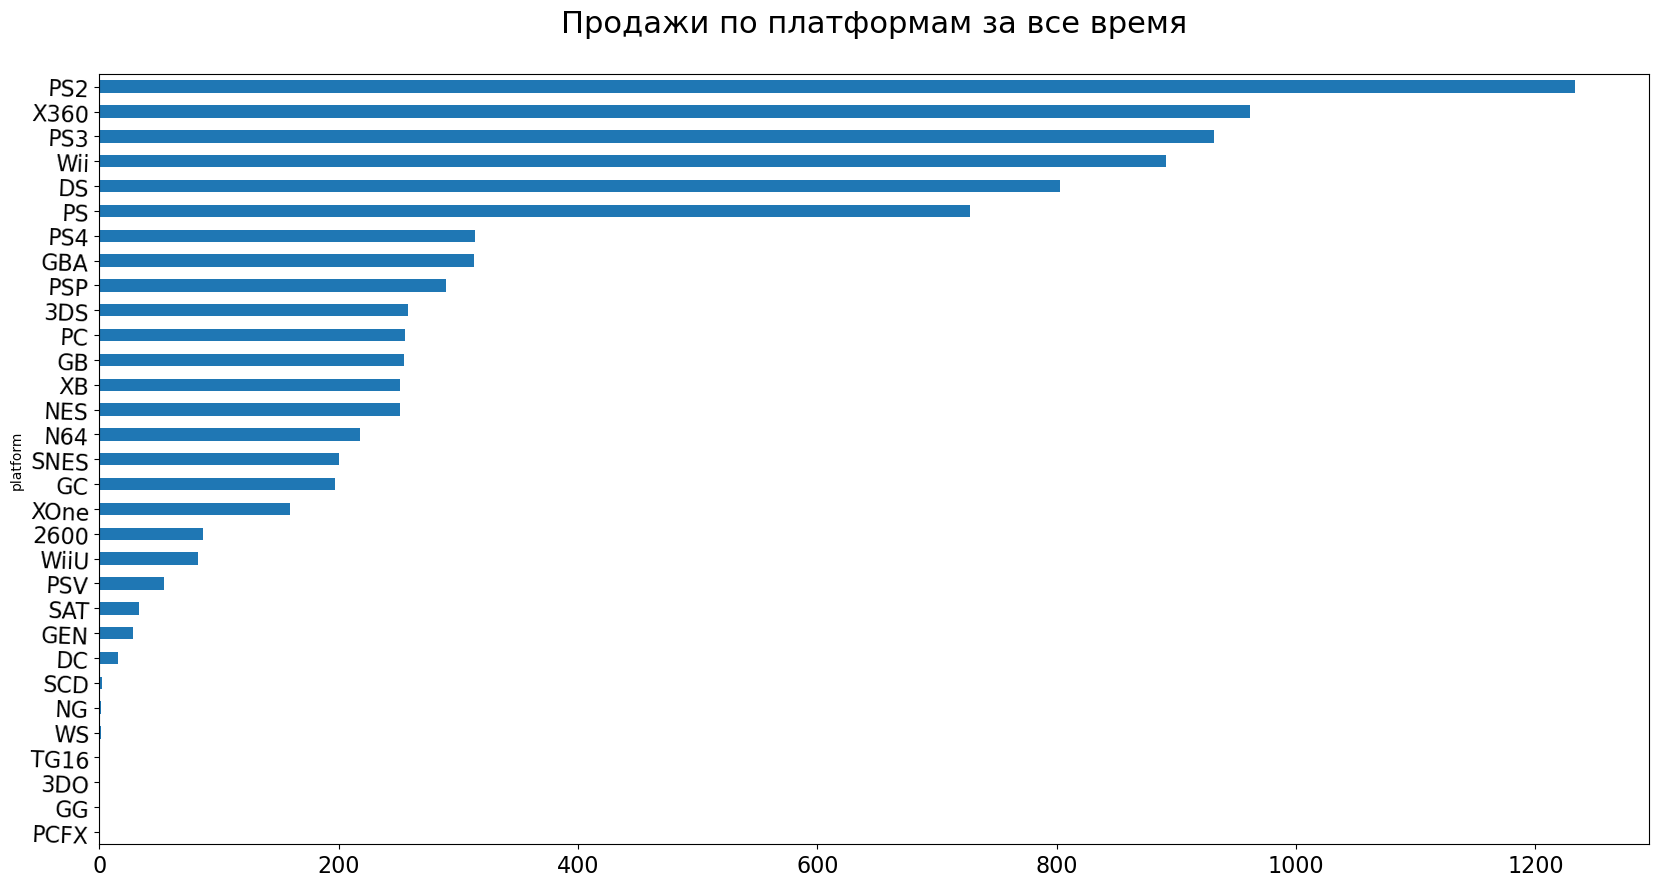

In [58]:
(platform_sales.plot(kind = 'barh', figsize=(20,10), rot = -2, legend = False, fontsize = 16)
               .set_title('Продажи по платформам за все время' + "\n", fontsize = 22, color = 'black'));

Среднее время жизни платформы 7.5 лет

#### Иследование для прогноза на 2017 год

Для иследования был взять период в 3 года. 2017 год как раз будет серединой жизни большинства актуальных на данный момент платформ.

In [59]:
liders_2016.head()

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


- В лидерах продаж последнего года ку нас 2 новые платформы на серидине жизненого цикла.(PS4 и Xbox One)
- На третьем месте 3DS уже подходящая к концу
- PS3 и  X360 устаревающие платформы

#### Уровнь продаж в зависимости от оценки игры

Из полученых графиокв видно, что оценки пользователей мало влияют на продажи. Отзывы критиков на прямую связаны с кол-вом последующих продаж.

#### Кол-во продаж в зависимости от жанра

Text(0.5, 1.0, 'Популярность жанров по миру (по медиане)\n')

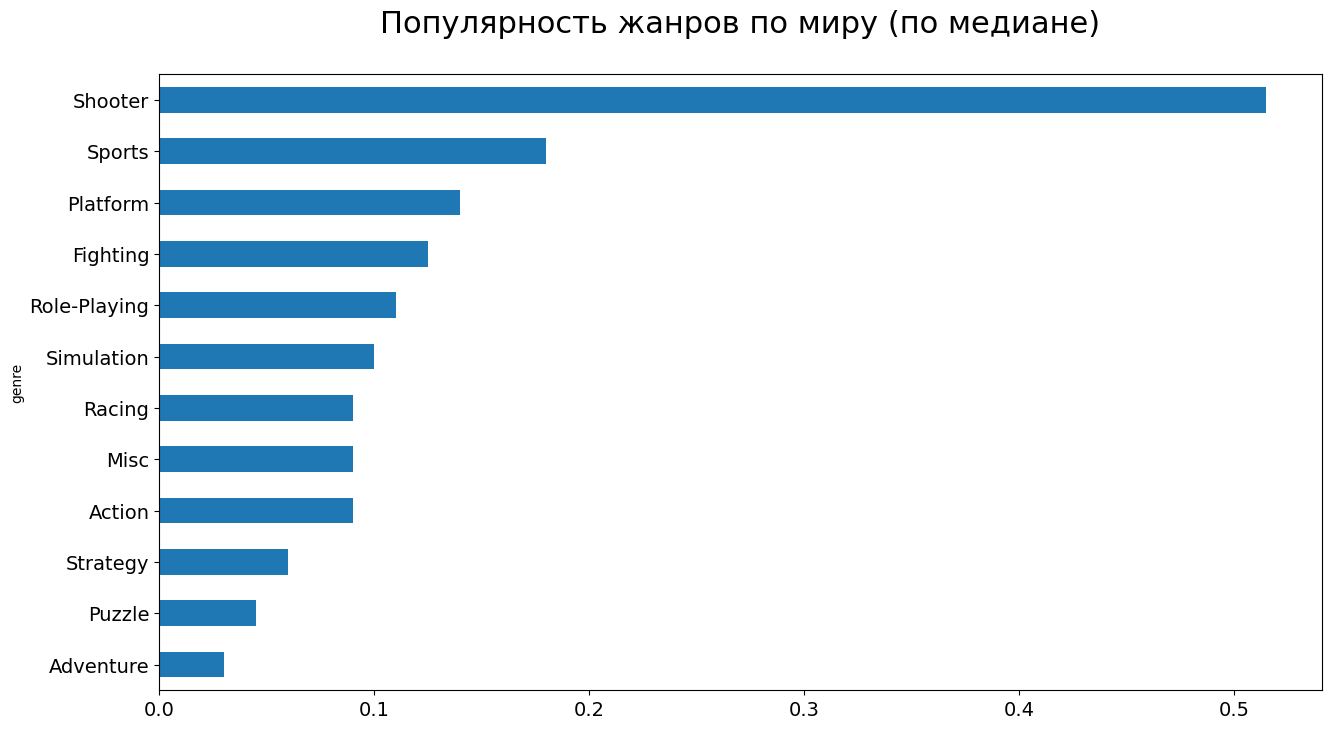

In [60]:
(genre_pivot_median.plot(kind = 'barh', figsize=(15,8), legend = False, fontsize = 14)
               .set_title('Популярность жанров по миру (по медиане)' + "\n", fontsize = 22, color = 'black'))

Сверх выгодно продовать шутеры но так же в топ-5 входят спортивные игры, платформеры, файтинги и ролевые игры

#### 2017

Из полученных данных можно сказть, что для нашего магазина выгоднее всего продавать:
- Игры на актуальны платформы (PS4 и Xbox One)
- Получившие высокие оценки критиков 
- Топ 5 самых покупаемых жанров 
- Так же интересны Экшен игры, отдельные игры продаются не огромными тирожами, но на рынке они представлены в самом большом объеме

### Портреты пользователей

Составлены портреты пользователей по регионам и получены инсайды:
1. Популярные платформы:

- Во всех регионах самой популярной платформой является PS4 и XOne
- В NA PC невходит в топ, в отличии т других регионов где он на 4 месте
- X360 присутвует только на Американском рынке

2. Популярные жанры:
- У европы и америки очень схожие предпочтения в жанрах (Шутеры и Экшн борятся за первое место)
- Гонки популярны только в европе
- Экшн-игры популярны везде
- Самый популрный жанр Японии ролевые-игры, самый не популярный шутеры(Что сущесвенно их отличает)
- Файтинги популярны только в Японии 
- На рынке японии не популярны спортивные игры

3. Влияние возрастного рейтинга на продажи:
- В Америке в каждом рейтинге хорошие продажи. "Взрослые"(М) игры самые популярные,  подростковые игры не популярны
- В Европе попцлярны либо взрослые, либо совсем детские. Игры для детей от 10 лет и подростковые не популярны.
- В Японии популярнее всего подростковые игры. И большое значение неопределеного возростногол рейтинга. Видимо на японском рынке лицензирование по возрасту как-то иначе устроено.

### Проверка гипотез

#### Гипотеза 1
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Предположение такое, пользовательская оценка игр на разных плафтормах одинакова.

Гипотеза оказалось не верна, поэтому ее стоит отвергнуть. Это может быть связано с тем, что одна игра на разных платформах может отличаться технически.

#### Гипотеза 2
**Средние пользовательские рейтинги жанров Action и Sports разные**

Сравниваем, что в зависимости от жанра оценки должны отличаться.

Гипотеза не смогли отвергнуть. Из нашей выборки можно сделать вывод, что оценки Экшн игр отличаются от спортивных.

Предположение логично, подвердилось скорее всего потому жанры сами по себе очень разные и пользователи имеют разные критерии их оценивания.